In [1]:
from sklearn.preprocessing import Normalizer
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
from model import GGNN
import torch.nn as nn
import time
import sys
from tqdm import tqdm
from model import Utils
from model import Plot

In [22]:
folder = 'torch files/'
Dataset15 = torch.load(folder + 'Dataset15.pt')
Dataset16 = torch.load(folder + 'Dataset16.pt')
Dataset17 = torch.load(folder + 'Dataset17.pt')

adj_matrices15 = torch.load(folder + 'adj_matrices15.pt')
adj_matrices16 = torch.load(folder + 'adj_matrices16.pt')
adj_matrices17 = torch.load(folder + 'adj_matrices17.pt')

## Hyperparameters

In [3]:
EPOCHS = 100 # 400 Training Epochs

PROPAG_STEPS = 5 # Neighborhood Interation
HIDDEN_LAYER = 64 # Hidden Layeer Size

BATCH_SIZE = 45 # Bath_size to train/test

## Model

In [4]:
import torch
torch.cuda.is_available()

True

In [5]:
model = GGNN.GGNNModel(1, HIDDEN_LAYER, PROPAG_STEPS).cuda()

### Dataset 15

In [6]:
STEPS_PER_EPOCH = int((len(Dataset15)/BATCH_SIZE) * 3) # 3 times

model, optimizer, statistics  = Utils.Train(EPOCHS, Dataset15, model, STEPS_PER_EPOCH,\
                                   adj_matrices15, BATCH_SIZE)


# saving
torch.save(model.state_dict(), '_model_15.pt')
torch.save(optimizer.state_dict(), '_optimizer_15.pt')
torch.save(statistics, 'Statistics_15.pt')

Epoch: 100 - Loss: 0.05 - Total_Time: 22.4 mins: 100%|███████████████████████████████| 773/773 [00:12<00:00, 59.50it/s]


In [7]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

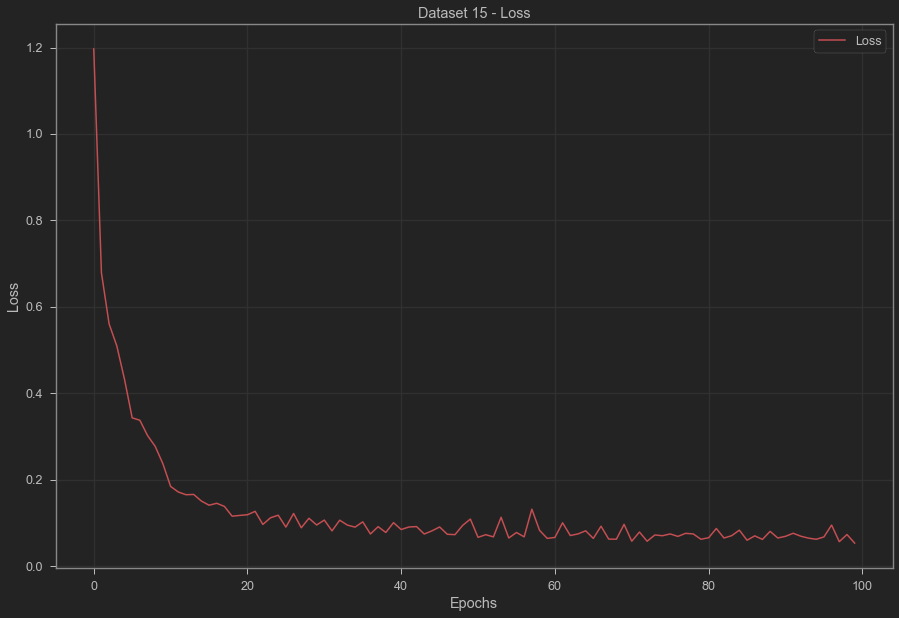

In [8]:
title = 'Dataset 15 - Loss'

label = "Loss"

color = 'r'

Plot.Plot(statistics['loss_ls'], title, label, color)

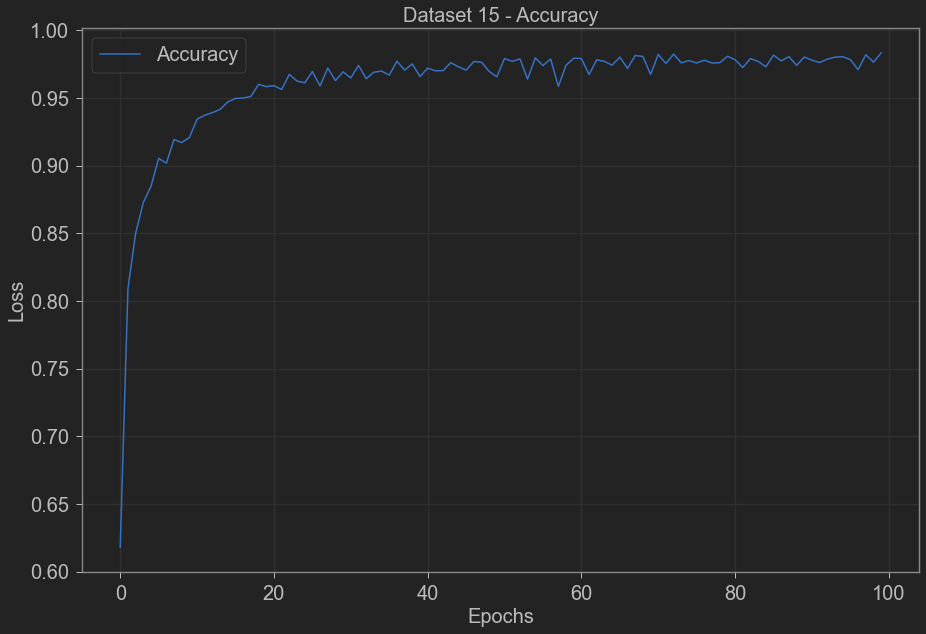

In [9]:
title = 'Dataset 15 - Accuracy'

label = "Accuracy"

color = 'b'

Plot.Plot(statistics['accuracy'], title, label, color)

>> condusion Matrix <<
Test
Predicted        0         1         2         3         4         5   \
Actual                                                                  
0          0.924346  0.001169  0.046327  0.002880  0.057471  0.000139   
1          0.001894  0.995270  0.001405  0.000043  0.005747  0.000379   
2          0.066484  0.002795  0.947343  0.004518  0.040230  0.000083   
3          0.002321  0.000046  0.003260  0.984976  0.040230  0.000015   
5          0.001717  0.000586  0.000232  0.000031  0.781609  0.999338   
9          0.001730  0.000025  0.000848  0.004943  0.045977  0.000012   
11         0.001507  0.000108  0.000585  0.002609  0.028736  0.000034   

Predicted        6         7         8         9         10        11  
Actual                                                                 
0          0.381579  0.159188  0.008850  0.000660  0.009346  0.000317  
1          0.263158  0.330128  0.004425  0.000006  0.074766  0.000090  
2          0.236842  0.111

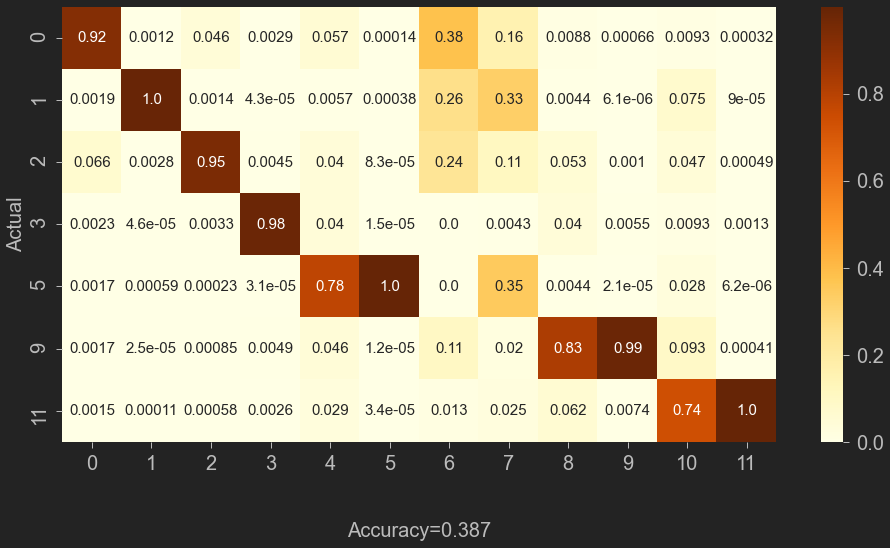

In [10]:
save_name_tst = 'Confusion_Matrix_Test'
color= 'YlOrBr'
Plot.Conf_Matrix(statistics['correct'], statistics['predict'], color, folder)

In [31]:
Acc = (0.92+1+0.95+0.98+1+0.99+1)/7
Acc

0.9771428571428571

### Dataset 16

In [23]:
STEPS_PER_EPOCH = int((len(Dataset16)/BATCH_SIZE) * 3) # 3 times

model, optimizer, statistics  = Utils.Train(EPOCHS, Dataset16, model, STEPS_PER_EPOCH,\
                                   adj_matrices16, BATCH_SIZE)


# saving
torch.save(model.state_dict(), '_model_16.pt')
torch.save(optimizer.state_dict(), '_optimizer_16.pt')
torch.save(statistics, 'Statistics_16.pt')

Epoch: 100 - Loss: 0.09 - Total_Time: 24.4 mins: 100%|███████████████████████████████| 870/870 [00:15<00:00, 56.69it/s]


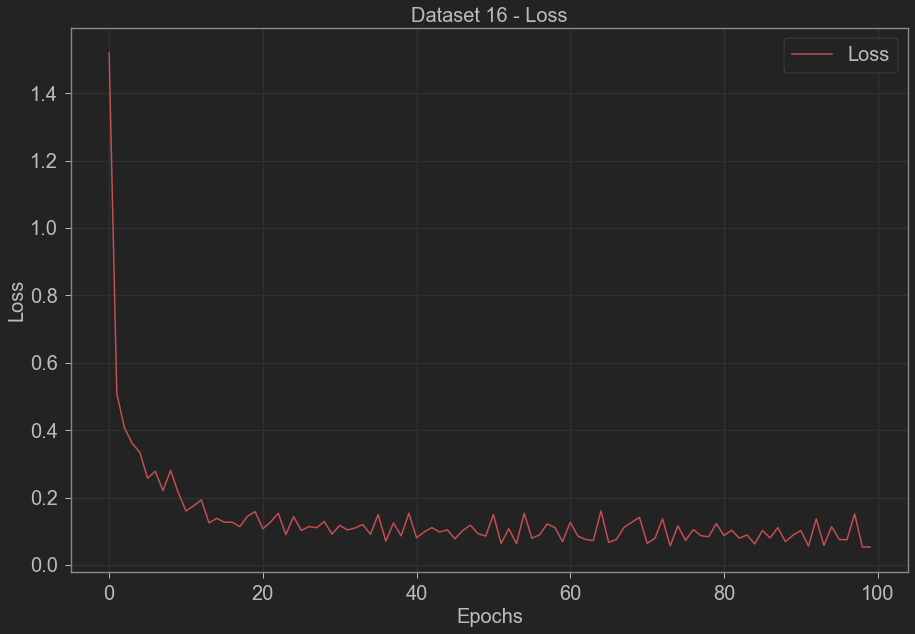

In [24]:
title = 'Dataset 16 - Loss'

label = "Loss"

color = 'r'

Plot.Plot(statistics['loss_ls'], title, label, color)

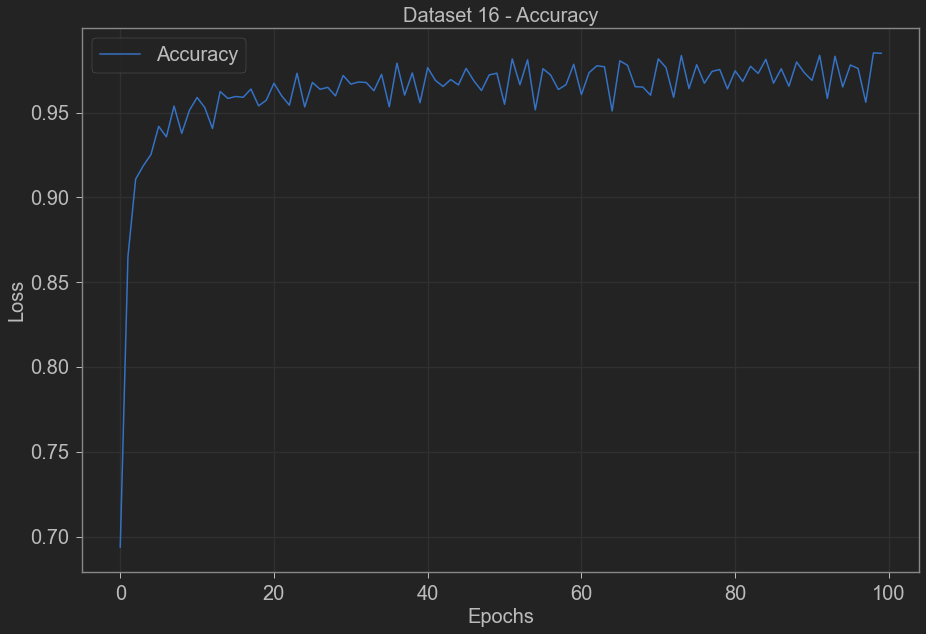

In [25]:
title = 'Dataset 16 - Accuracy'

label = "Accuracy"

color = 'b'

Plot.Plot(statistics['accuracy'], title, label, color)

>> condusion Matrix <<
Test
Predicted        0         1         2         3         4         5   \
Actual                                                                  
0          0.940855  0.063916  0.030991  0.003156  0.372662  0.241636   
1          0.038317  0.920802  0.014123  0.001896  0.056115  0.089219   
2          0.012214  0.011713  0.951078  0.002323  0.133813  0.076208   
3          0.002001  0.001168  0.001854  0.991670  0.164029  0.007435   
7          0.001920  0.000886  0.000958  0.000175  0.035971  0.185874   
10         0.001192  0.000316  0.000174  0.000095  0.145324  0.011152   
13         0.001123  0.000367  0.000221  0.000108  0.010072  0.052045   
16         0.001216  0.000486  0.000311  0.000246  0.024460  0.157993   
18         0.001163  0.000346  0.000289  0.000332  0.057554  0.178439   

Predicted        6         7         8         9         10        11  \
Actual                                                                  
0          0.087824  0

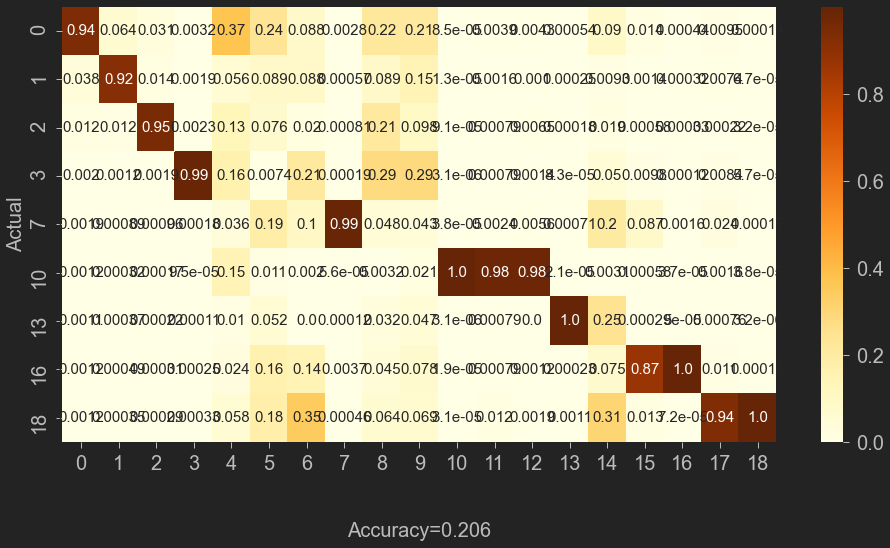

In [26]:
save_name_tst = 'Confusion_Matrix_Test'
color= 'YlOrBr'
Plot.Conf_Matrix(statistics['correct'], statistics['predict'], color, folder)

In [32]:
Acc = (0.94+0.92+0.95+0.99+0.99+1+1+1+1)/9
Acc

0.9766666666666666

### Dataset 17

In [27]:
STEPS_PER_EPOCH = int((len(Dataset17)/BATCH_SIZE) * 3) # 3 times

model, optimizer, statistics  = Utils.Train(EPOCHS, Dataset17, model, STEPS_PER_EPOCH,\
                                   adj_matrices17, BATCH_SIZE)


# saving
torch.save(model.state_dict(), '_model_17.pt')
torch.save(optimizer.state_dict(), '_optimizer_17.pt')
torch.save(statistics, 'Statistics_17.pt')

Epoch: 100 - Loss: 0.11 - Total_Time: 39.1 mins: 100%|█████████████████████████████| 1353/1353 [00:24<00:00, 54.88it/s]


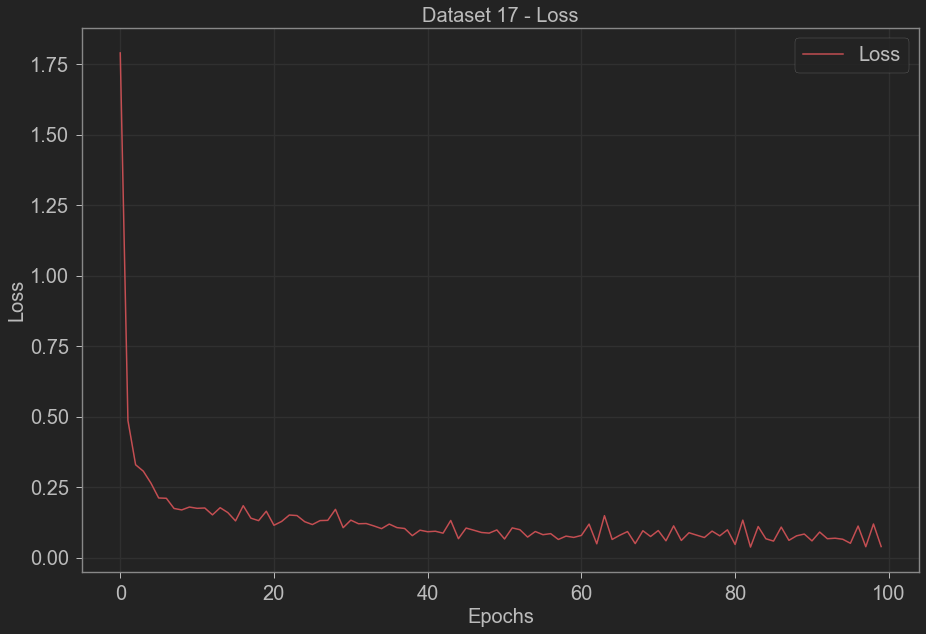

In [28]:
title = 'Dataset 17 - Loss'

label = "Loss"

color = 'r'

Plot.Plot(statistics['loss_ls'], title, label, color)

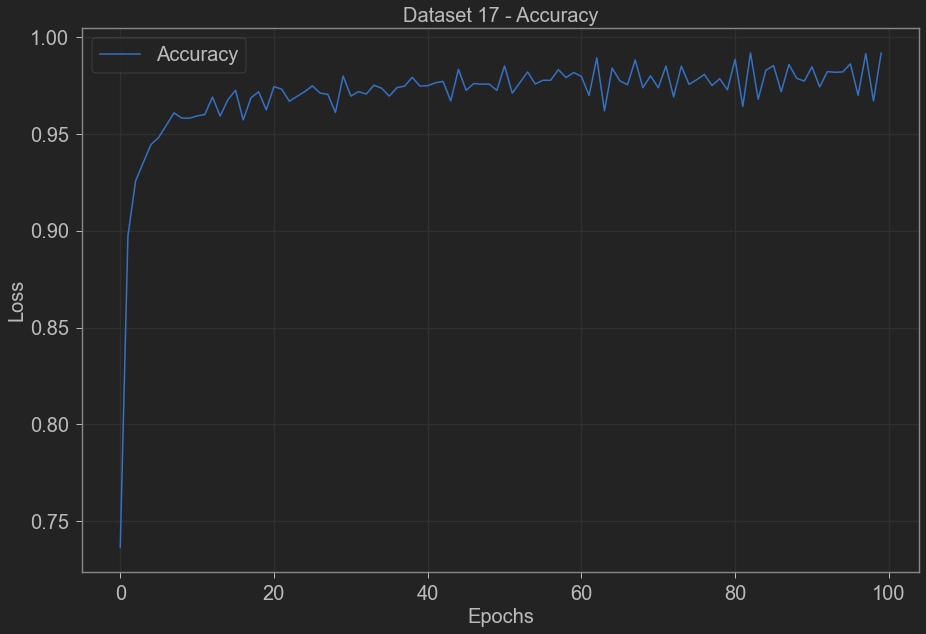

In [29]:
title = 'Dataset 17 - Accuracy'

label = "Accuracy"

color = 'b'

Plot.Plot(statistics['accuracy'], title, label, color)

>> condusion Matrix <<
Test
Predicted        0         1         2         3         4         6   \
Actual                                                                  
0          0.971019  0.101420  0.123374  0.032893  0.135632  0.008510   
3          0.009297  0.146045  0.121040  0.942589  0.077011  0.005124   
6          0.001682  0.048682  0.022674  0.009605  0.112644  0.970634   
7          0.006906  0.079108  0.334445  0.007463  0.120690  0.007125   
8          0.001468  0.177485  0.115038  0.001553  0.059770  0.000540   
9          0.001018  0.066937  0.049350  0.000961  0.119540  0.000796   
10         0.000961  0.067951  0.012004  0.001860  0.008046  0.000119   
11         0.000862  0.010142  0.004335  0.000586  0.006897  0.000079   
12         0.001642  0.097363  0.078026  0.000924  0.144828  0.002004   
13         0.001459  0.037525  0.099700  0.000442  0.018391  0.001092   
14         0.000839  0.007099  0.005335  0.000207  0.109195  0.000390   
15         0.000898  0.

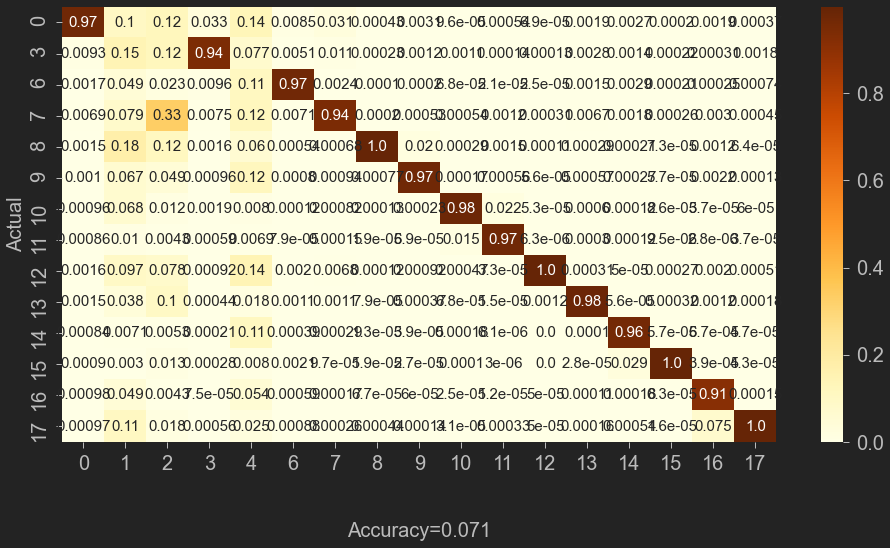

In [30]:
save_name_tst = 'Confusion_Matrix_Test'
color= 'YlOrBr'
Plot.Conf_Matrix(statistics['correct'], statistics['predict'], color, folder)

In [33]:
Acc = (0.97+0.94+0.97+0.94+1+0.97+0.98+0.97+1+0.98+0.96+1+0.91+1)/14
Acc

0.9707142857142858